In [ ]:
import zipfile
import os

zip_path = "/content/archive (8).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully")

BadZipFile: File is not a zip file

In [ ]:
import kagglehub
path = kagglehub.dataset_download("dankok/diabetic-retinopathy-image-dataset")


100%|██████████| 408M/408M [00:06<00:00, 64.1MB/s]

Extracting files...


In [ ]:
import os

print(path)
os.listdir(path)


/root/.cache/kagglehub/datasets/dankok/diabetic-retinopathy-image-dataset/versions/1


['Segmentation', 'Disease_Grading', 'Localization']

In [ ]:
import os

dg_path = os.path.join(path, "Disease_Grading")
os.listdir(dg_path)


['Groundtruths', 'Original_Images']

In [ ]:
gt_path = os.path.join(path, "Disease_Grading", "Groundtruths")
os.listdir(gt_path)


['IDRiD_Disease Grading_Training Labels.csv',
 'IDRiD_Disease Grading_Testing Labels.csv']

In [ ]:
import pandas as pd

train_csv = os.path.join(gt_path, "IDRiD_Disease Grading_Training Labels.csv")
df = pd.read_csv(train_csv)

df.head()


,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import os

img_path = "/root/.cache/kagglehub/datasets/dankok/diabetic-retinopathy-image-dataset/versions/1/Disease_Grading/Original_Images"

len(os.listdir(img_path)), os.listdir(img_path)[:5]


(2, ['Training Set', 'Testing Set'])

In [ ]:
import os

train_img_path = "/root/.cache/kagglehub/datasets/dankok/diabetic-retinopathy-image-dataset/versions/1/Disease_Grading/Original_Images/Training Set"

len(os.listdir(train_img_path)), os.listdir(train_img_path)[:5]


(413,
 ['IDRiD_014.jpg',
  'IDRiD_206.jpg',
  'IDRiD_136.jpg',
  'IDRiD_111.jpg',
  'IDRiD_051.jpg'])

In [ ]:
import pandas as pd

label_path = "/root/.cache/kagglehub/datasets/dankok/diabetic-retinopathy-image-dataset/versions/1/Disease_Grading/Groundtruths/IDRiD_Disease Grading_Training Labels.csv"

df = pd.read_csv(label_path)
df.head()


,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Keep only required columns
df = df[['Image name', 'Retinopathy grade']]

# Rename columns (easy usage)
df.columns = ['image', 'grade']

df.head()


,image,grade
0,IDRiD_001,3
1,IDRiD_002,3
2,IDRiD_003,2
3,IDRiD_004,3
4,IDRiD_005,4


In [ ]:

df['label'] = df['grade'].apply(lambda x: 0 if x == 0 else 1)

df.head()


,image,grade,label
0,IDRiD_001,3,1
1,IDRiD_002,3,1
2,IDRiD_003,2,1
3,IDRiD_004,3,1
4,IDRiD_005,4,1


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm


In [ ]:
IMAGE_SIZE = 224

def load_images(df, img_path):
    X = []
    y = []

    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_name = row['image'] + ".jpg"
        img_file = os.path.join(img_path, img_name)

        if os.path.exists(img_file):
            img = cv2.imread(img_file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
            img = img / 255.0

            X.append(img)
            y.append(row['label'])

    return np.array(X), np.array(y)


In [ ]:
X, y = load_images(df, train_img_path)

print(X.shape)
print(y.shape)


100%|██████████| 413/413 [00:31<00:00, 12.91it/s]


(413, 224, 224, 3)
(413,)


In [ ]:
y[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print("Images shape:", X.shape)
print("Labels shape:", y.shape)


Images shape: (413, 224, 224, 3)
Labels shape: (413,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


NameError: name 'x' is not defined

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train images:", X_train.shape)
print("Validation images:", X_val.shape)
print("Train labels:", y_train.shape)
print("Validation labels:", y_val.shape)


Train images: (330, 224, 224, 3)
Validation images: (83, 224, 224, 3)
Train labels: (330,)
Validation labels: (83,)


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_val, y_val)
)


NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_val, y_val)
)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step - accuracy: 0.6610 - loss: 0.7628 - val_accuracy: 0.7590 - val_loss: 0.6130
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6583 - loss: 0.6303 - val_accuracy: 0.6747 - val_loss: 0.5176
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7079 - loss: 0.5203 - val_accuracy: 0.7108 - val_loss: 0.5051
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7663 - loss: 0.4918 - val_accuracy: 0.7711 - val_loss: 0.4936
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7693 - loss: 0.4696 - val_accuracy: 0.7952 - val_loss: 0.4729
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7718 - loss: 0.4763 - val_accuracy: 0.7831 - val_loss: 0.4383
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7733 - loss: 0.4460 - val_accuracy: 0.7952 - val_loss: 0.4757
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7871 - loss: 0.4827 - val_accuracy: 0.7470 -

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


NameError: name 'history' is not defined

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_val, y_val)
)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8275 - loss: 0.4251 - val_accuracy: 0.7349 - val_loss: 0.4958
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8134 - loss: 0.4404 - val_accuracy: 0.7952 - val_loss: 0.4641
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8010 - loss: 0.3936 - val_accuracy: 0.7952 - val_loss: 0.4787
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8156 - loss: 0.3735 - val_accuracy: 0.7831 - val_loss: 0.5139
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8423 - loss: 0.3931 - val_accuracy: 0.7229 - val_loss: 0.4863
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8288 - loss: 0.3657 - val_accuracy: 0.7952 - val_loss: 0.4594
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8057 - loss: 0.4509 - val_accuracy: 0.8193 - val_loss: 0.4544
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8570 - loss: 0.3044 - val_accuracy: 0.8193 - v

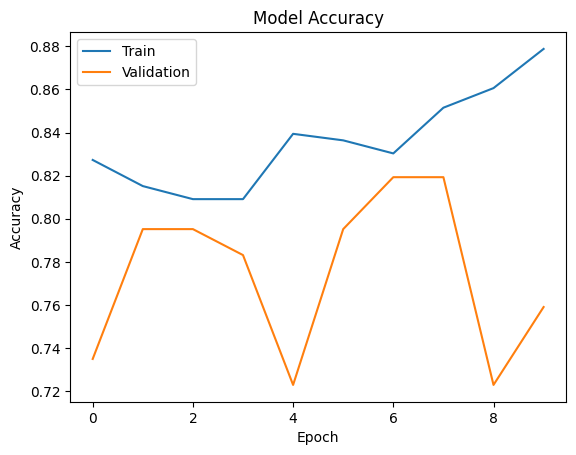

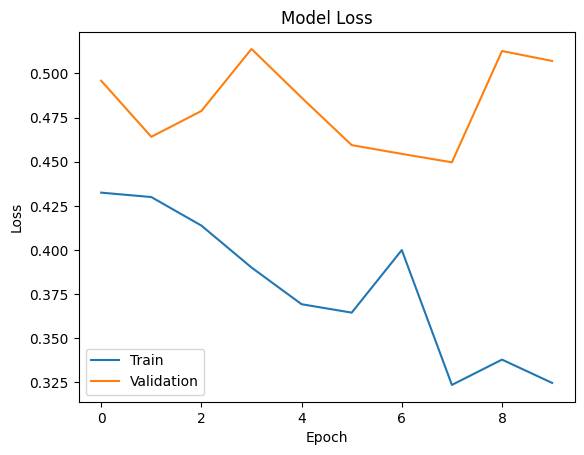

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


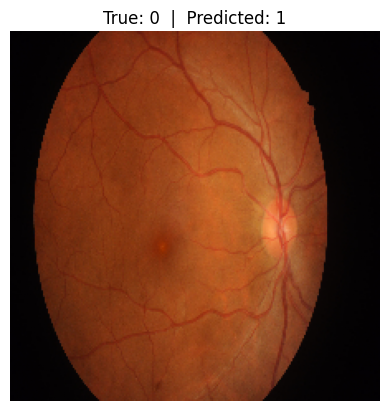

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Take one validation image
index = 5   # you can change this number

sample_image = X_val[index]
true_label = y_val[index]

# Predict
prediction = model.predict(np.expand_dims(sample_image, axis=0))
pred_label = 1 if prediction[0][0] > 0.5 else 0

# Display
plt.imshow(sample_image)
plt.title(f"True: {true_label}  |  Predicted: {pred_label}")
plt.axis("off")
plt.show()
